# Breast Cancer Detection with Classification

<em><font style="color: #1034A6; font-size: 20px;">Introduction</font></em>

The goal of this project is to determine an optimal model for predicting whether cancer is benign or malignant using the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). Multiple classification models would be tested and opimized through analyzing precision, recall, and hyperparameters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cancer = pd.read_csv('cancer.csv') # load data
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We see that our data has 33 columns containing information about our cell. However, the data description noted that the following are the distinct features:

- ID
- Diagnosis *Target
- perimetere) 
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

All those features contains a variation of mean value, standard error, and the mean of three largest values. For our purpose, we would only need the mean value for each feature.

In [3]:
cancer_clean = cancer.drop(cancer.columns[12:], axis=1)
print(cancer_clean.shape)
cancer_clean.head()

(569, 12)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Now our dataset contains 569 instances of 10 features and 1 target feature. Let's now look at some statistics for our data.

In [4]:
cancer_clean.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


The numbering of the id column seems to be related to case number. In our case, we can omit the id column in proceeding steps to ensure our modeling isn't influenced. We see a large flunctuation from the area feature, which in other context might require verification from an expert in the field. For our sake, since most of our data is numerical, let's plot the histogram to visualize any potential inconsitency in the pattern of our features.

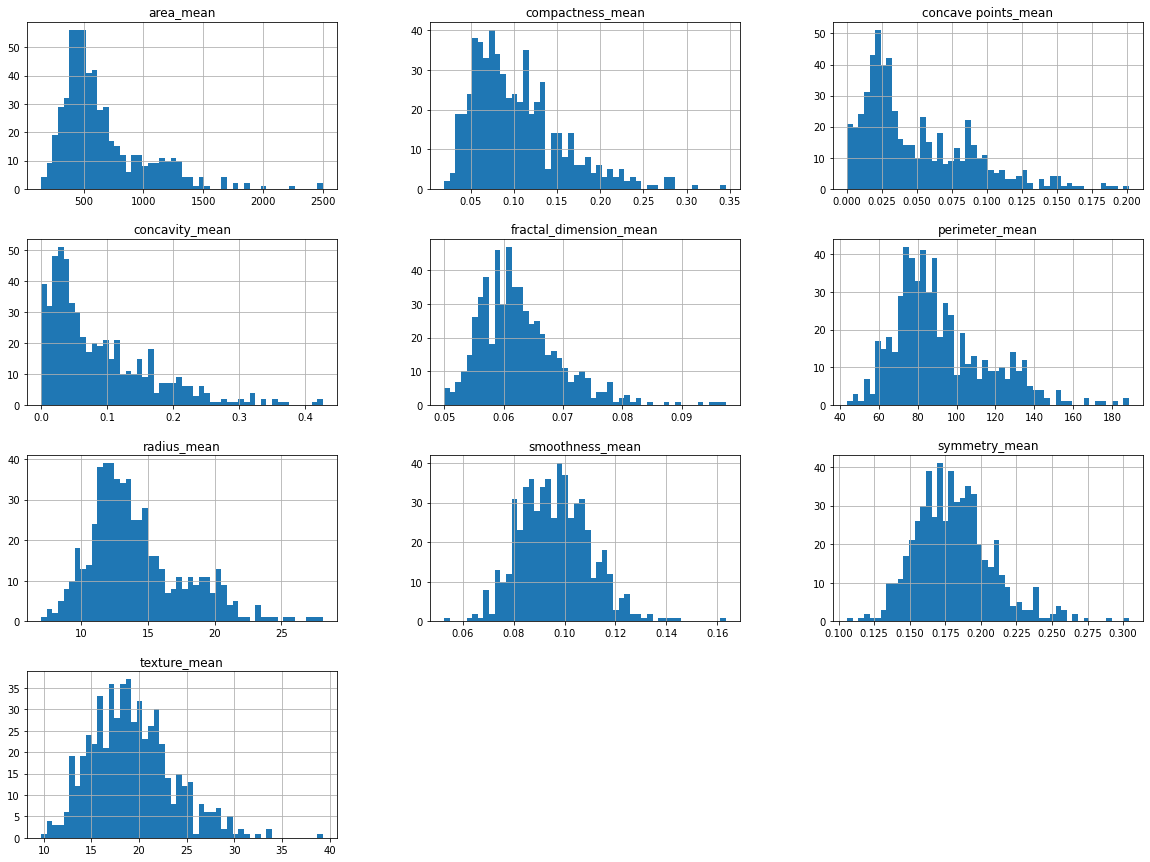

In [5]:
cancer_clean = cancer_clean.drop(['id'], axis=1)
cancer_clean.hist(bins=50, figsize=(20,15))
plt.show()

Most features are tail-heavy, and the scales of them vary. This suggests the necessecity to scale our data before we fit any model. Before we explore the data any further, let's examine the target column and create a test set.

In [6]:
cancer_clean['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

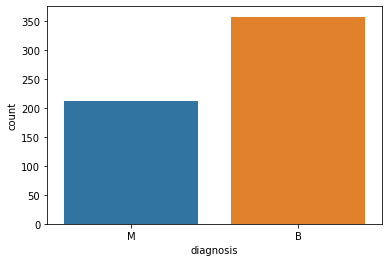

In [7]:
import seaborn as sns

y = cancer_clean['diagnosis']
ax = sns.countplot(y, label='Count')

The dataset has a fair split between a malignant and a benign diagnosis. 

***

<em><font style="color: #1034A6; font-size: 20px;">Create Test Set</font></em>

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cancer_clean, test_size=0.2, random_state=42)

***

<em><font style="color: #1034A6; font-size: 20px;">Data Visualization and Correlation</font></em>

Before visualizing our data, it might be beneficial to first visualize our data and see if we could draw any intuitive conclusion that might give us insight into selecting a optimal model. 

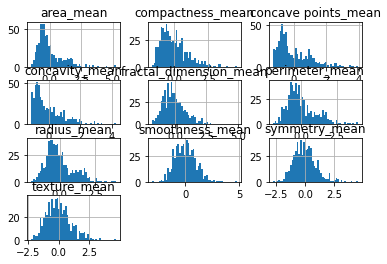

In [9]:
# Standarize feature
cancer_std = train_set.copy()
cancer_std = cancer_clean.drop('diagnosis', axis=1)
cancer_std = (cancer_std - cancer_std.mean()) / (cancer_std.std())
cancer_final = pd.concat([cancer_clean['diagnosis'].copy(), cancer_std], axis=1)

# Make sure data retain the same proportion
cancer_final.hist(bins=50)
plt.show()

Since our task is classification, it might be beneficial to examine the how each feature contribute to the target. This might allow us to eliminate certain features.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

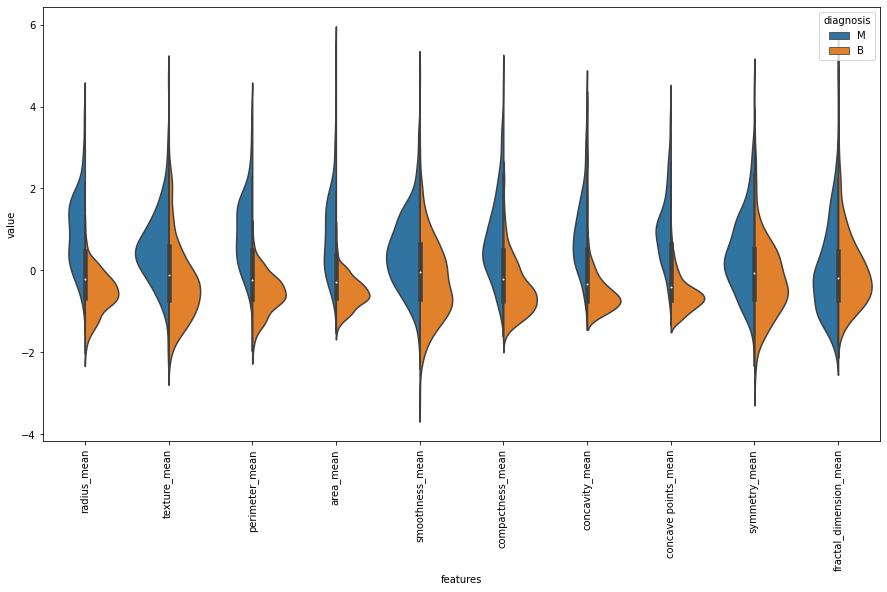

In [10]:
cancer_visualize = pd.melt(cancer_final, id_vars = 'diagnosis', var_name = 'features', value_name = 'value')
plt.figure(figsize = (15, 8))
sns.violinplot(x="features", y="value", hue="diagnosis", data=cancer_visualize, split=True)
plt.xticks(rotation=90)

We see that the factal dimension mean feature has a similar distribution between malignant and benign cells, which suggest that this feature should be discluded when fitting a classification model. Now let's focus on the correlation between features. Before we do that, we need to convert our target column which contains categorial data to numeric data.

In [11]:
# 0 - benign, 1 - malignant

replacement = {'M': 1, 'B': 0}
cancer_encoded = cancer_final.replace(replacement)
cancer_encoded.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764
1,1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889
2,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658
3,1,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602
4,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956


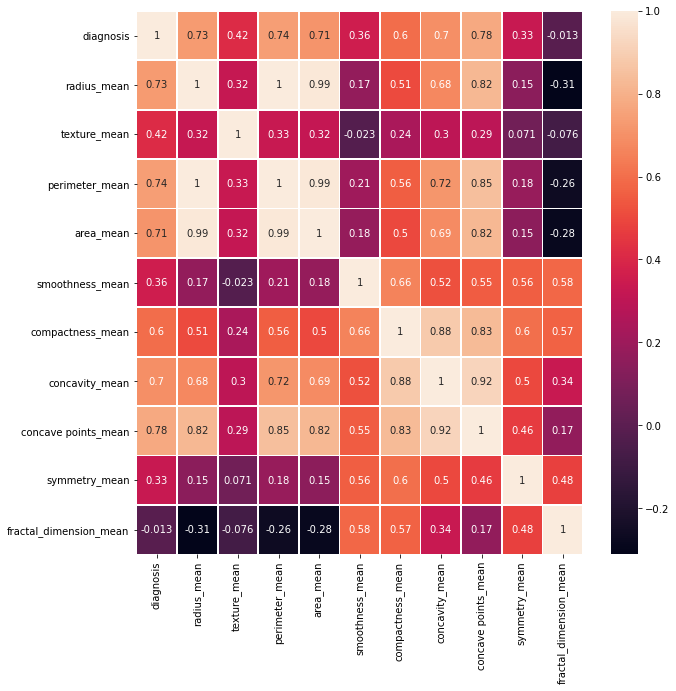

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(cancer_encoded.corr(), annot=True, linewidth=0.7)

Couple of points:
- Aligned with observation with violin plots, the feature fractal_dimension_mean has no correlation to our target value.
- radius_mean and perimeter_mean has very similar correlation values, which might suggest they are strongly correlated features and one might be ommitted to imporve model efficiency.

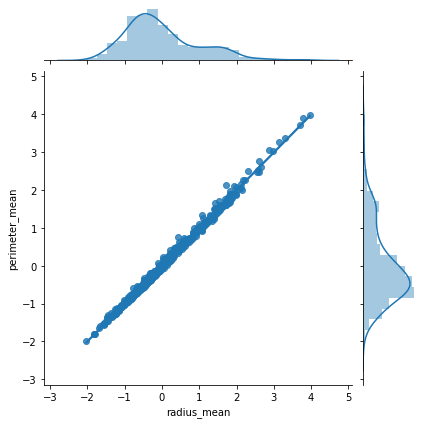

In [13]:
sns.jointplot(cancer_encoded.loc[:, 'radius_mean'], cancer_encoded.loc[:, 'perimeter_mean'], kind='regg')

indeed! The perimeter data is likely to be derived from radius, in this case we should omit perimeter to enhance our model performance.

***

<em><font style="color: #1034A6; font-size: 20px;">Feature Selection and Prepare Data</font></em>

Most data are prepared prior to the analysis process, and we don't have any missing value. In this case, we should select the optimal features given the conclusion we draw from the last section and start fitting some classification mdoels.

In [14]:
cancer_data = train_set.copy()

In [15]:
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
68,B,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046
181,M,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398
63,B,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963
248,B,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329
60,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960


Let's construct a pipeline that standardize the data and seperate the training data into features and targets.

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

In [17]:
# Create target column
cancer_label = cancer_data['diagnosis'].copy()

In [18]:
# Prepare training set
cancer = cancer_data.drop(['diagnosis','perimeter_mean', 'fractal_dimension_mean'], axis=1).copy()

In [19]:
cancer_prepared = pipeline.fit_transform(cancer)

***

<em><font style="color: #1034A6; font-size: 20px;">Select and Train Model</font></em>

We have cleaned our data and selected the most optimal features, and now it is time to finally fit some models to generate predictions. Due to the relatively small size of our dataset, we are going to test and evaluate the following models:

- Logistic Regression
- Random Forest
- Support Vector Machine
- K Nearest Neighbor

In [20]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(cancer_prepared, cancer_label)

LogisticRegression()

Let's use confusion matrix to evaluate our model accuracy. For our reasons, we are going to define a cancer being malignant as True and benign as False, to fit with our question: Is the cancer cell malignant or benign?

In [21]:
from sklearn.model_selection import cross_val_predict

cancer_train_pred = cross_val_predict(log_reg, cancer_prepared, cancer_label, cv=10)

In [22]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(cancer_label, cancer_train_pred, labels=['B', 'M'])
cf_matrix

array([[275,  11],
       [ 17, 152]])

The first row is for benign, (aka the cancer is not malignant). And the second row is for malignant cells. Let's decompose our confusion matrix by plotting and labeling it. We might also want to write a function that plots the confusion matrix for us since we might repeat this procedure later. As we are constructing the function, we might as well calculate the summary statitstics for analysis reasons.

In [23]:
def make_confusion_matrix(cf_matrix, ticklabels=True, cmap='Blues'):
    '''
    INPUT:
    ---------------
    cf_matrix: The confusion matrix to draw
    ticklabels: x and y tick labels. (default = True)
    cmap: color map (default = 'Blues')
    '''
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_count = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentage = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_count, group_percentage)]
    labels = np.array(labels).reshape(2,2)
   
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap=cmap, xticklabels=ticklabels, yticklabels=ticklabels)
    # Summary Stat
    accuracy = np.trace(cf_matrix) / float(np.sum(cf_matrix))
    
    if len(cf_matrix) == 2: # Additional stat for binary matrix
        precision = cf_matrix[1,1] / sum(cf_matrix[:,1]) # Accuracy of positive prediction
        recall = cf_matrix[1,1] / sum(cf_matrix[1,:]) # sensitivity, true positive rate
        f1_score = 2*precision*recall / (precision + recall) # harmonic mean
        stat_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
    else:
        stat_text = "\n\nAccuracy={:0.3f}".format(accuracy)
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label' + stat_text)

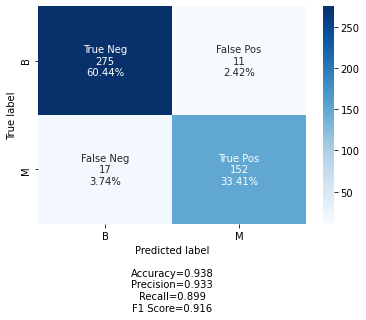

In [24]:
make_confusion_matrix(cf_matrix, ticklabels=['B', 'M'])

Our scores look pretty well for our logistic regression classfier! We have a f1 score of 0.916 which indicates that our model has a relatively high precision and recall. Since we are predicting the diagnosis of a cancer cell, and an incorrect diagnosis might lead to tragic events, we should make sure that our precision is as high as possible. We could sacrifice some recall amount since diagnosing a benign cell as malignant is better than the other way around. 

Let's now fit more models before setting thresholds to maxmize our precision.

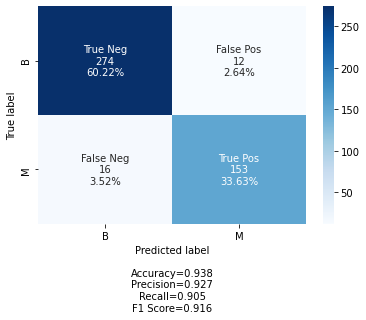

In [25]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(cancer_prepared, cancer_label)
cancer_forest_pred = cross_val_predict(forest_clf, cancer_prepared, cancer_label, cv=10)
forest_cf_matrix = confusion_matrix(cancer_label, cancer_forest_pred, labels=['B', 'M'])
make_confusion_matrix(forest_cf_matrix, ticklabels=['B', 'M'])

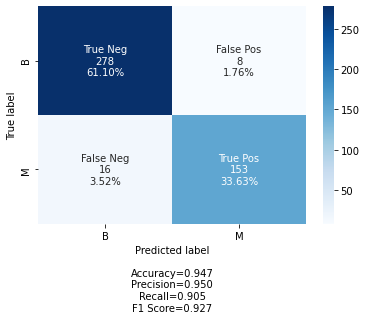

In [26]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(cancer_prepared, cancer_label)
cancer_svm_pred = cross_val_predict(svm_clf, cancer_prepared, cancer_label, cv=10)
svm_cf_matrix = confusion_matrix(cancer_label, cancer_svm_pred, labels=['B', 'M'])
make_confusion_matrix(svm_cf_matrix, ticklabels=['B', 'M'])

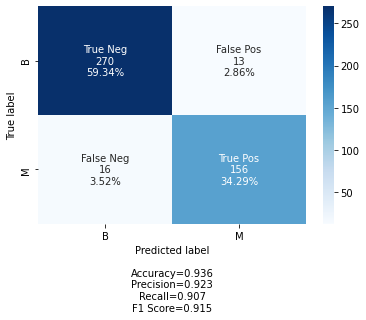

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(cancer_prepared, cancer_label)
knn_pred = cross_val_predict(knn_clf, cancer_prepared, cancer_label, cv=10)
knn_cf_matrix = confusion_matrix(knn_pred, cancer_label)
make_confusion_matrix(knn_cf_matrix, ticklabels=['B', 'M'])

From the four models, we see that our support vector classifier yield the best result in terms of F1 score, and it has the highest precision (what we want). 

In [28]:
svm_scores = cross_val_predict(svm_clf, cancer_prepared, cancer_label, cv=10, method='decision_function')

In [31]:
replacement = {'B': 0, 'M': 1}
cancer_label.replace(replacement, inplace=True)

Text(0, 0.5, 'Precision')

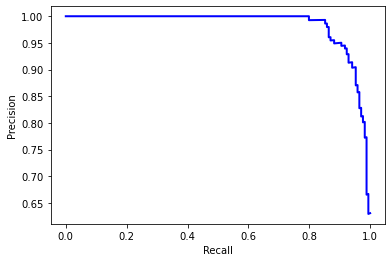

In [37]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(cancer_label, svm_scores)

plt.plot(recalls, precisions, "b-", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")

We see that the precision starts to drop below 1.00 when recall reaches around 0.8. Since we want to make sure every patient that has the slightest chance of having a malignant cell to be treated, we are going to force our model to have 100% precision. The resulted recall from that threshold is acceptable.

In [38]:
threshold_100_precision = thresholds[np.argmax(precisions >= 1)]
svm_train_pred_100 = (svm_scores >= threshold_100_precision)

In [43]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(cancer_label, svm_train_pred_100))
print(recall_score(cancer_label, svm_train_pred_100))

1.0
0.7988165680473372


We have generated a classifier that has 100% precision and 80% recall! This fits our task of classifying cancer cells well. Now let's test our model on test sets.

<em><font style="color: #1034A6; font-size: 20px;">Evaluate on Test Set</font></em>

In [50]:
test_data = test_set.copy()
X_test_clean = test_data.drop(['diagnosis','perimeter_mean', 'fractal_dimension_mean'], axis=1)
X_test_prepared = pipeline.fit_transform(X_test_clean)
y_test = test_data['diagnosis'].copy()

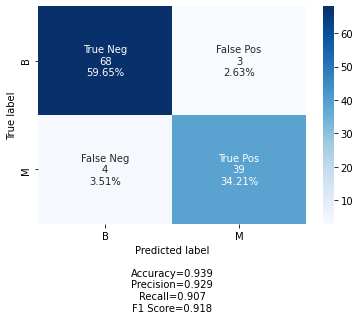

In [62]:
y_pred = cross_val_predict(svm_clf, X_test_prepared, y_test, cv=10)
y_cf_matrix = confusion_matrix(y_test, y_pred)
make_confusion_matrix(y_cf_matrix, ticklabels = ['B', 'M'])

Our classifier performed very well on the test set! We could tune the model further in order to achieve a precision of 100 percent, which is ideal, and may be required for our case. But for now, this model is successful!